# Assignment 4: Feature Engineering

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [59]:
from __future__ import print_function, division
%matplotlib inline

In [60]:
# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn import linear_model, decomposition, datasets
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 --- [0 marks] ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [61]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 --- [5 marks] ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

In [62]:
# Your code goes here
X

,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,...,written,wrong,yankees,yeah,year,years,yes,york,young,zone
0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.133553,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,0.0,0.420916,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [63]:
X.describe()

,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,...,written,wrong,yankees,yeah,year,years,yes,york,young,zone
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,...,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000
mean,0.002436,0.002149,0.006709,0.001454,0.002286,0.003953,0.003115,0.000921,0.008366,0.001816,...,0.002612,0.006811,0.002470,0.003564,0.016934,0.008797,0.006381,0.002772,0.003288,0.001626
std,0.030224,0.020739,0.034631,0.023100,0.021634,0.030111,0.026958,0.016275,0.043921,0.026026,...,0.026988,0.039172,0.032786,0.031238,0.061181,0.039346,0.037319,0.025381,0.030929,0.022175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.723914,0.420916,0.431380,0.519765,0.443354,0.663808,0.572124,0.413233,1.000000,0.578282,...,0.723081,0.568146,0.878185,0.693531,0.650649,0.455493,0.646447,0.572455,0.703771,0.605576


y: ['rec.sport.baseball' 'rec.sport.baseball' 'rec.sport.hockey' ...,
 'comp.sys.ibm.pc.hardware' 'rec.sport.hockey' 'rec.sport.hockey'], shape of y: (2845,)


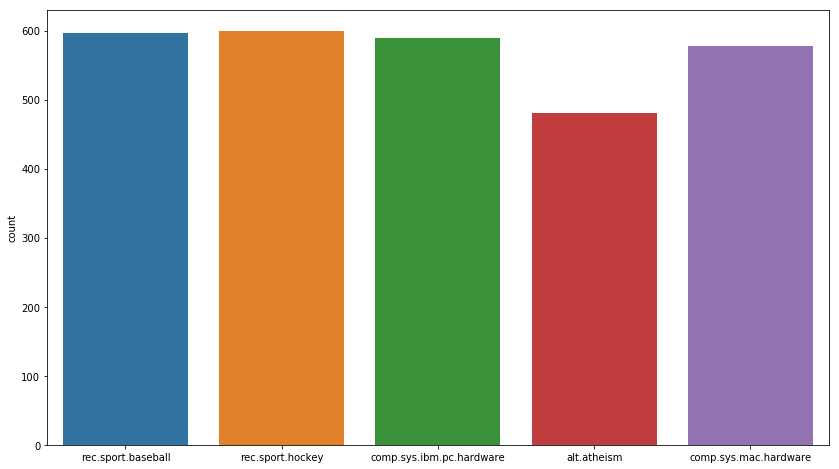

In [64]:
print('y: {}, shape of y: {}'.format(y,y.shape))
fig1 = plt.figure(figsize=(14, 8))
sns.countplot(y)
plt.show()

*Your answer goes here*

We can see that `X` is a data frame with 2845 data points (rows; representing each document) and 1000 attributes (columns; representing each possible word). We should also notice that the data is very sparse which means that only few of the considered words appearch in each document (since the 'stop words' had been eliminated in the preprocessing step, we are not dealing with very common words such as 'a' or 'the'). The frequency of each words is represented by tf-idf weight which assign a greater value to the words that appear more often in the smaller number of documents (making the easy to destinguish from the others).

`y` is a numpy array of length 2845 and contains labels for each data point (`alt.atheism`, `comp.sys.ibm.pc.hardware`, `comp.sys.mac.hardware`, `rec.sport.baseball`, `rec.sport.hockey`).

### ========== Question 1.2 --- [2 marks] ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [65]:
# Your code goes here
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

# ========== Question 1.3 --- [6 marks] ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [66]:
# Your code goes here
#1:
print('Mean of the euclidean distances of all data points from the mean data point: {}'.format(euclidean_distances(X,kmeans.cluster_centers_).mean()))
#2:
print('Inertia of the model: {}'.format(kmeans.inertia_))
#3:
print('Adjusted rand index of the model: {}'.format(adjusted_rand_score(y,kmeans.labels_)))

Mean of the euclidean distances of all data points from the mean data point: 0.97715107285
Inertia of the model: 2593.26745106
Adjusted rand index of the model: 0.236459358529


*Your answer goes here*

Inertia: squared difference between datapoints and their closest cluster centre. It can be thought as a measure of how internally coherent clusters are. The lower the inertia, the better the fit is.

Adjusted rand score: is a function that measures the similarity of  two assignments (ignoring permutations). In this case the assignments are clusterings and we count pairs that are assigned to cluster (the same or different) in the true and the predicted clusterings. Negative or close to 0 values of the adjusted rand score indicate very bad labelling (e.g. independent labelings), whereas the value of 1 means perfect labelling (e.i. identical clusterings). This measure is also symmetric which means that swapping the argument does not change the score.

It seems that the model performs pretty poorly considering both inertia and adjusted rand score.

Inertia: It is hard to compare this measure to any other model since this the only one. However, because the value of inertia in this case is 2593 which is very big (significantly greater than ideal case of 0), this means that the points are far away from their assigned cluster centres. 

Adjusted rand score: the value of 0.236459358529 indicates that the labelling is far from being perfect (much smaller than 1). Moreover, this value is not much higher than 0.2 which would be the expected value in case of 'random guess' with 5 classes (random assignment).

### ========== Question 1.4 --- [3 marks] ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [67]:
# Your code goes here
print('Number of datapoint associated with each label:')
for c in cats:
    print('{}: {}'.format(c, len(y[y == c])))
print('\nNumber of datapoints assigned to each cluster:')
for i in range(0,len(cats)):
    print('{}: {}'.format(i, len(kmeans.labels_[kmeans.labels_ == i])))

Number of datapoint associated with each label:
alt.atheism: 480
comp.sys.ibm.pc.hardware: 590
comp.sys.mac.hardware: 578
rec.sport.baseball: 597
rec.sport.hockey: 600

Number of datapoints assigned to each cluster:
0: 1028
1: 221
2: 307
3: 601
4: 688


*Your answer goes here*

We can see that data points are spread much more evenly across the labels (difference between the biggest and the smallest set of 120) than across different clusters (difference of 807). 

K-means produced very imbalanced distribution across clusters with cluster 0 being much more dominant than the rest. The ideal situation would be if the data was spread across the clusters in the same way as for the actual labels.

### ========== Question 1.5 --- [3 marks] ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [68]:
# Your code goes here
print('Distance matrix:\n{}'.format(euclidean_distances(kmeans.cluster_centers_,kmeans.cluster_centers_)))

Distance matrix:
[[ 0.          0.34374521  0.23330485  0.20265703  0.18763549]
 [ 0.34374521  0.          0.41216404  0.4076788   0.32073454]
 [ 0.23330485  0.41216404  0.          0.29943647  0.29271357]
 [ 0.20265703  0.4076788   0.29943647  0.          0.28842491]
 [ 0.18763549  0.32073454  0.29271357  0.28842491  0.        ]]


### ========== Question 1.6 --- [3 marks] ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

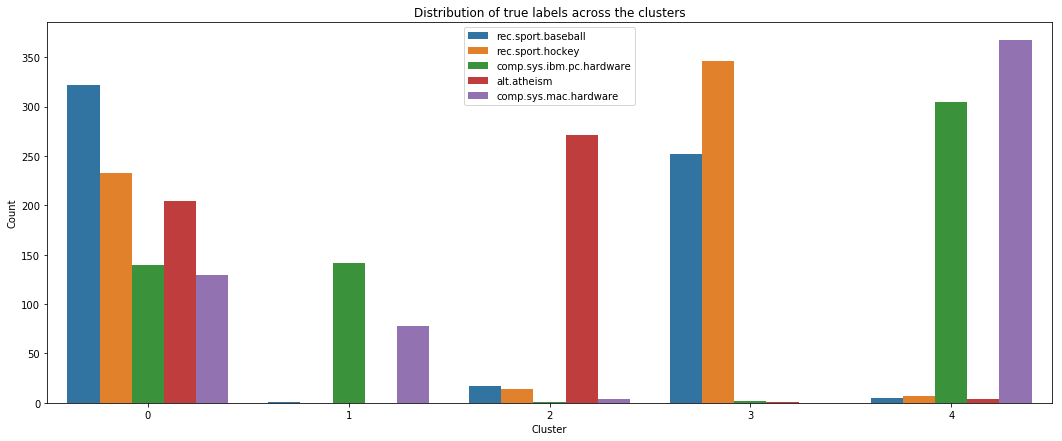

In [69]:
# Your code goes here
fig2 = plt.figure(figsize=(18, 7))
sns.countplot(x=kmeans.labels_, hue=y)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of true labels across the clusters')
plt.show()

*Your answers goes here*

We can see that the points with specific labels were spread very randomly across the clusters. Cluster 0 contains documents of all possible labels, whereas cluster 2 consists a great part of documents related to atheism (`alt.atheism`). However, we can also notice some regularities in this distribution.

We knew before that `rec.sport.baseball` and `rec.sport.hockey` document categories are strongly related to each other. This can be reflected by the fact that they were distributed across the clusters in a very similar manner (relatively similar number of counts in every cluster with high values in clusters 0 and 3).
The exact same principle applies to `comp.sys.ibm.pc.hardware` and `comp.sys.mac.hardware`document categories. These categories recorded relatively similar numbers of counts in every cluster with high values in clusters 0, 1 and 4.

In the ideal situation the cluster would be pure, meaning that each of the documents with the same category would be assigned to the same cluster (or at least great majority). In this case, only cluster 2 is close to that which might be due to the fact that majority of its points are labelled as `alt.atheism` and this class is not related to any other class considered here. However, a great number of documents about atheism was also assigned to cluster 0.

The distribution is far from ideal and can explain poor performance of the model.

### ========== Question 1.7 --- [8 marks] ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better

In [70]:
# Your code goes here
comp = [1,2,3,5,10,20,50,100,500,1000]
sc = []

for i in range(0,len(comp)):
    pca = PCA(n_components=comp[i])
    X_pca = pca.fit_transform(X)
    kmeans_pca = KMeans(n_clusters=5, random_state=0)
    kmeans_pca.fit(X_pca)
    print('Component of {}:'.format(comp[i]))
    print('Inertia: {}:'.format(kmeans_pca.inertia_))
    print('adjusted_rand_score: {}\n'.format(adjusted_rand_score(y,kmeans_pca.labels_)))
    sc.append(adjusted_rand_score(y,kmeans_pca.labels_))

Component of 1:
Inertia: 2.8213596322:
adjusted_rand_score: 0.209762688299

Component of 2:
Inertia: 10.5655186969:
adjusted_rand_score: 0.268243601241

Component of 3:
Inertia: 20.4746027085:
adjusted_rand_score: 0.240899890257

Component of 5:
Inertia: 49.8053232845:
adjusted_rand_score: 0.220108622478

Component of 10:
Inertia: 117.787321159:
adjusted_rand_score: 0.211494330978

Component of 20:
Inertia: 230.692130049:
adjusted_rand_score: 0.210889598063

Component of 50:
Inertia: 488.48031722:
adjusted_rand_score: 0.214870281117

Component of 100:
Inertia: 800.491390068:
adjusted_rand_score: 0.219721650937

Component of 500:
Inertia: 2132.15799556:
adjusted_rand_score: 0.237785653988

Component of 1000:
Inertia: 2593.2685802:
adjusted_rand_score: 0.227553075189



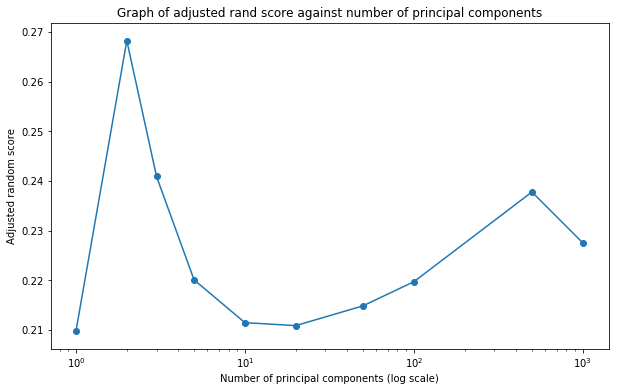

In [71]:
fig3 = plt.figure(figsize=(10, 6))
plt.plot(comp,sc)
plt.scatter(comp,sc)
plt.xscale('log')
plt.xlabel('Number of principal components (log scale)')
plt.ylabel('Adjusted random score')
plt.title('Graph of adjusted rand score against number of principal components')
plt.show()

*Your answer goes here*

1) The graph shows how number of principal components (x-axis) affects the value of adjusted random score (y-axis). The highest adjusted random score (th best value for it) was recorded when only 2 dimensions were considered.

2) We cannot use innertia to decide what value of principal components is the best number since the inertia is not a normalised metric for the comparison. Its value depends on dimensionality (as we can see from our results, its value increases as the number of principal components increases). Since we know that the lower the value for innertia, the better (0 meaning ideal), so if we would judge the best number of principal components on inertia, we would tend to pick low numbers of principal components which iwill not necessarily yield the best results.

3) Having a huge number of dimensions may slow computations of k-means significantly. However, most importantly, dimensionality reduction could help k-means perform better since less significant dimensions would not be considered (PCA picks the most 'important'/influential dimensions with the highest variance). Less influential dimensions could only unnecessary affect the mean (centre) and increase the distances between points.

### ========== Question 1.8 --- [6 marks] ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

In [72]:
# Your code goes here
#1:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [73]:
#2:
kmeans_pca = KMeans(n_clusters=5, random_state=0)
kmeans_pca.fit(X_2d)
print('adjusted_rand_score: {}'.format(adjusted_rand_score(y,kmeans_pca.labels_)))

adjusted_rand_score: 0.26769723435


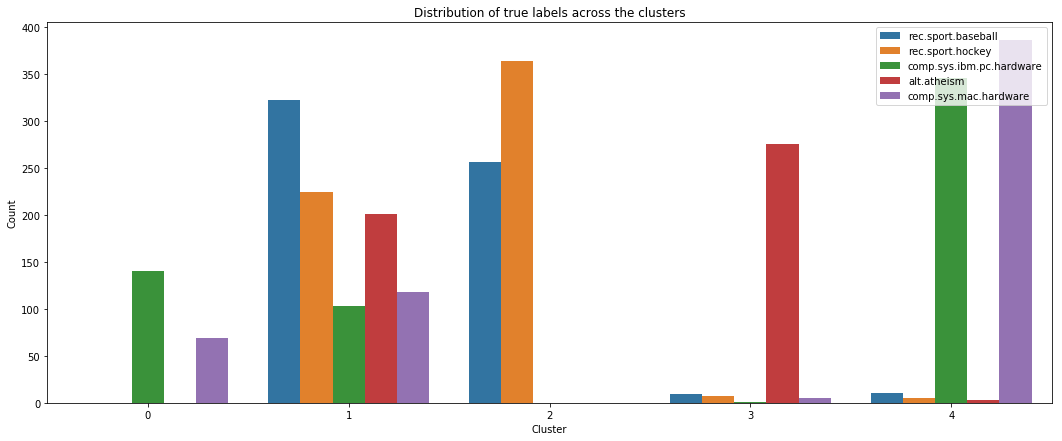


Number of datapoints assigned to each cluster:
0: 209
1: 968
2: 620
3: 298
4: 750


In [74]:
#3:
fig4 = plt.figure(figsize=(18, 7))
sns.countplot(x=kmeans_pca.labels_, hue=y)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of true labels across the clusters')
plt.show()

print('\nNumber of datapoints assigned to each cluster:')
for i in range(0,len(cats)):
    print('{}: {}'.format(i, len(kmeans_pca.labels_[kmeans_pca.labels_ == i])))

*Your answer goes here*

Dimensionality reduction increased the value of `adjusted_rand_score` which is a positive change (brings it closer to the ideal value of 1) indicating increased performance of the clustering. However, the change is not significant as some could expect (from 0.236459358529 to 0.26769723435).

Dimensionality reduction also improved performance of the clustering if we consider their true label distribution graphs. We used to have 1 huge cluster and many smaller onces, whereas now the data is distributed slightly more evenly (with 3 big clusters and 2 small ones). The shape of the graphs are very similar but we can notice that the clusters are slightly more 'pure' (however not significantly). Moreover, similar classes tend to be still within the same cluster.

### ========== Question 1.9 --- [1 mark] ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

In [99]:
# Your code goes here
cats_i = ['comp.sys.ibm.pc.hardware', 'rec.sport.baseball','rec.sport.hockey', 'alt.atheism', 'comp.sys.mac.hardware' ]
labels_interp = np.array(cats_i)[kmeans_pca.labels_]

### ========== Question 1.10 --- [3 marks] ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

In [97]:
# Your code goes here
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

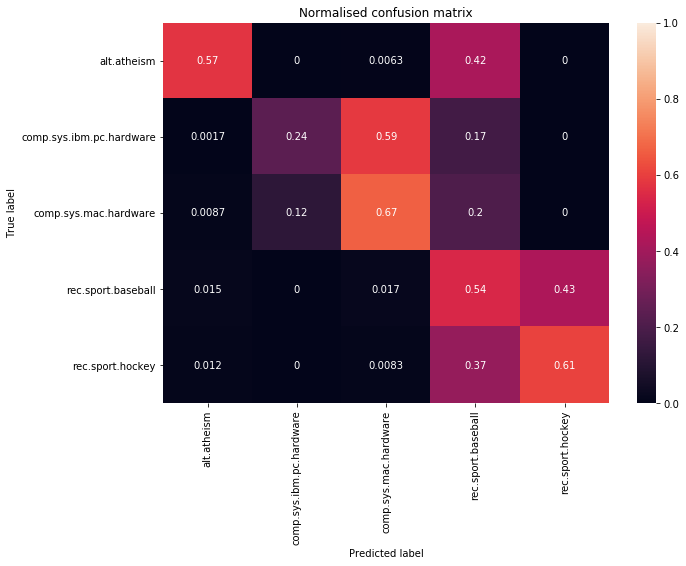

In [100]:
fig5 = plt.figure(figsize=(10, 7))
conf_mat = confusion_matrix(y, labels_interp)
nor_conf_mat = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(nor_conf_mat, classes=cats, title='Normalised confusion matrix')
plt.show()

### ========== Question 1.11 --- [6 marks] ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

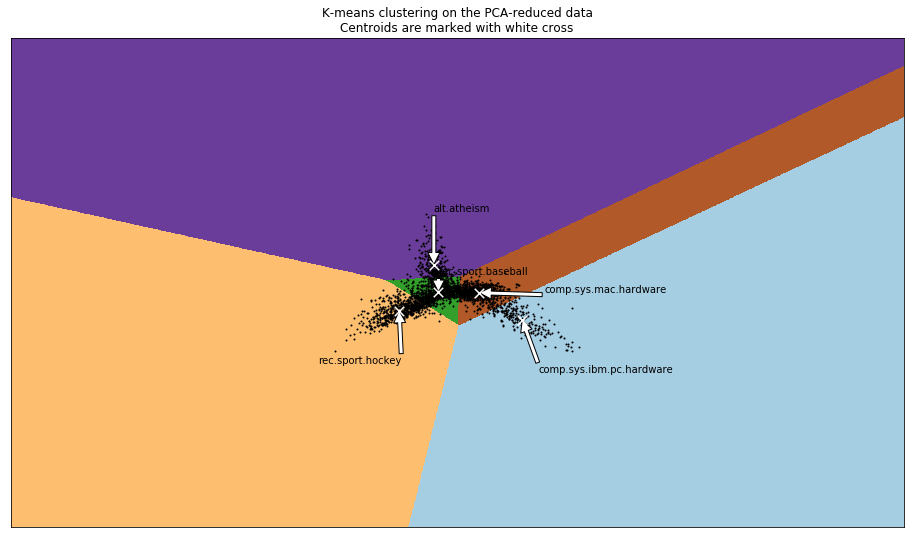

In [103]:
# Your code goes here
h = .002

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16, 9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=90, linewidths=3,
            color='w', zorder=10)

#Label each cluster centre
plt.annotate(cats_i[0], xy=centroids[0], xytext=[centroids[0][0]+0.05,centroids[0][1]-0.3],
             arrowprops=dict(facecolor='white'))
plt.annotate(cats_i[1], xy=centroids[1], xytext=[centroids[1][0],centroids[1][1]+0.1],
             arrowprops=dict(facecolor='white'))
plt.annotate(cats_i[2], xy=centroids[2], xytext=[centroids[2][0]-0.25,centroids[2][1]-0.3],
             arrowprops=dict(facecolor='white'))
plt.annotate(cats_i[3], xy=centroids[3], xytext=[centroids[3][0],centroids[3][1]+0.3],
             arrowprops=dict(facecolor='white'))
plt.annotate(cats_i[4], xy=centroids[4], xytext=[centroids[4][0]+0.2,centroids[4][1]],
             arrowprops=dict(facecolor='white'))

plt.title('K-means clustering on the PCA-reduced data\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

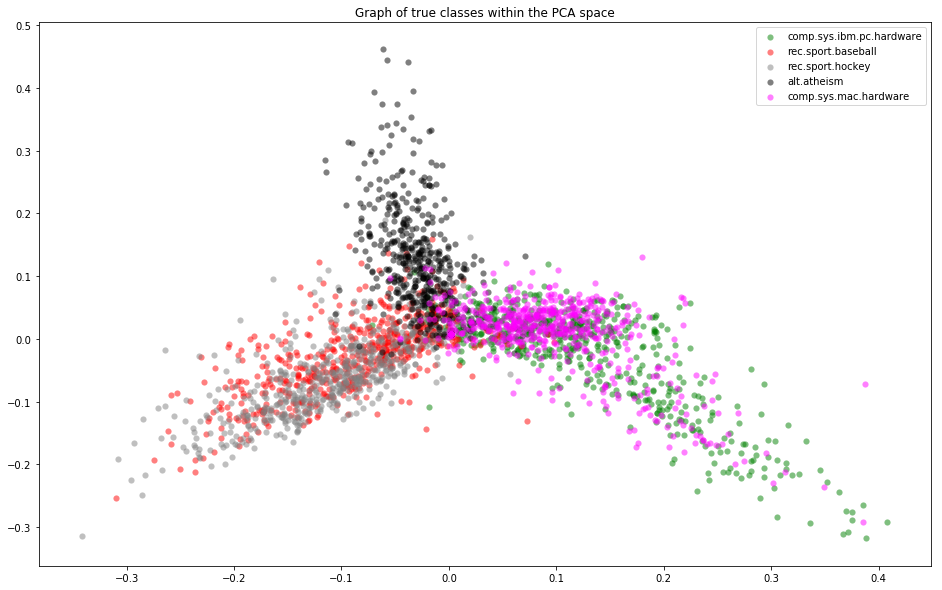

In [106]:
fig6 = plt.figure(figsize=(16, 10))
colours = ['green', 'red', 'grey', 'black', 'magenta']

for colour, i, cat in zip(colours, [0, 1, 2, 3, 4], cats_i):
    plt.scatter(X_2d[y == cats_i[i], 0], X_2d[y == cats_i[i], 1], color=colour, alpha=.5, lw=0.1, label=cat)
plt.legend(loc='best')
plt.title('Graph of true classes within the PCA space')
plt.show()

### ========== Question 1.12 --- [4 marks] ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

*Your answer goes here*

1) No, since different starting points (initial centres of clusters) will result in different classification. K-means always converges but to the local minimum so the outcome depends on the initialisation (we can reproduce the results since we specified the seed).

2) Yes, sice we just set `n_clusters` parameter to `5` and `random_state` to `0` with other parameters set as default. This means that the algorithm was ran 10 times with different centroid seeds (default for `n_init` is 10). The final result was judged on the value of inertia for each run (the one with the lowest inertia was chosen).

3) Another method for initialising centrs is random initialisation. The issue with this is that it can lead to very bad results (local minimum) where points which are very close to each other could be assigned to different cluseters (wheras points that are far away could be assigned to the same one). This situation is well pictured in the lecture slides about k-means clustering (slide 9): https://www.learn.ed.ac.uk/bbcswebdav/pid-2651659-dt-content-rid-5009665_1/courses/INFR100692017-8SV1SEM1/kmeans.pdf

## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 --- [0 marks] ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [80]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 --- [8 marks] ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. What are the max/min values for each dimension?
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots, answer this question in a markdown cell:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

In [81]:
# Your code goes here
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [82]:
# 1
pd.DataFrame(digits.data).describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [83]:
# 2
dig = pd.DataFrame(digits.data)
mini = dig.min()
maxi = dig.max()
print('Min and max values for each dimension:')
for i in range(0,64):
    print('\nDimension: {}\nMin: {}\nMax: {}'.format(i, mini[i], maxi[i]))

Min and max values for each dimension:

Dimension: 0
Min: 0.0
Max: 0.0

Dimension: 1
Min: 0.0
Max: 8.0

Dimension: 2
Min: 0.0
Max: 16.0

Dimension: 3
Min: 0.0
Max: 16.0

Dimension: 4
Min: 0.0
Max: 16.0

Dimension: 5
Min: 0.0
Max: 16.0

Dimension: 6
Min: 0.0
Max: 16.0

Dimension: 7
Min: 0.0
Max: 15.0

Dimension: 8
Min: 0.0
Max: 2.0

Dimension: 9
Min: 0.0
Max: 16.0

Dimension: 10
Min: 0.0
Max: 16.0

Dimension: 11
Min: 0.0
Max: 16.0

Dimension: 12
Min: 0.0
Max: 16.0

Dimension: 13
Min: 0.0
Max: 16.0

Dimension: 14
Min: 0.0
Max: 16.0

Dimension: 15
Min: 0.0
Max: 12.0

Dimension: 16
Min: 0.0
Max: 2.0

Dimension: 17
Min: 0.0
Max: 16.0

Dimension: 18
Min: 0.0
Max: 16.0

Dimension: 19
Min: 0.0
Max: 16.0

Dimension: 20
Min: 0.0
Max: 16.0

Dimension: 21
Min: 0.0
Max: 16.0

Dimension: 22
Min: 0.0
Max: 16.0

Dimension: 23
Min: 0.0
Max: 8.0

Dimension: 24
Min: 0.0
Max: 1.0

Dimension: 25
Min: 0.0
Max: 15.0

Dimension: 26
Min: 0.0
Max: 16.0

Dimension: 27
Min: 0.0
Max: 16.0

Dimension: 28
Min: 0.0
M

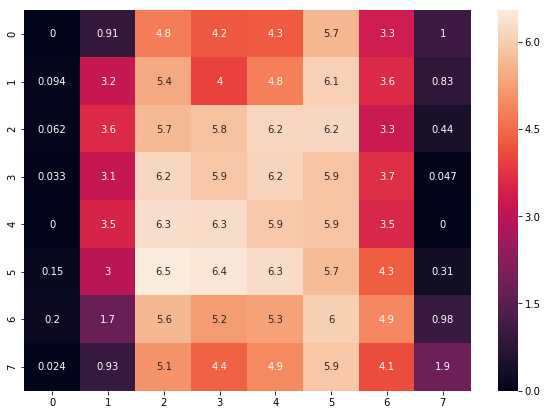

In [84]:
# 3
stds = dig.describe().loc['std']
stds = stds.values.reshape(8,8)

fig7 =  plt.figure(figsize=(10, 7))
sns.heatmap(stds, annot=True)
plt.show()

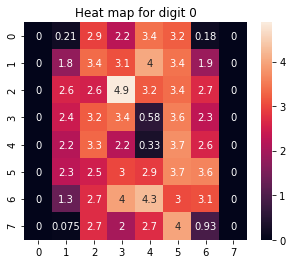

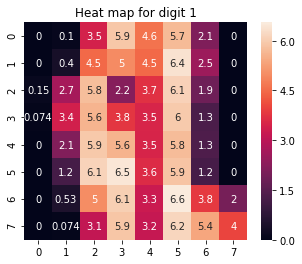

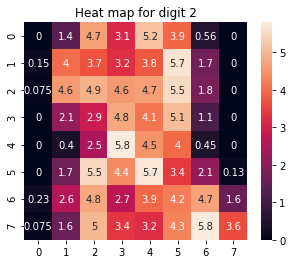

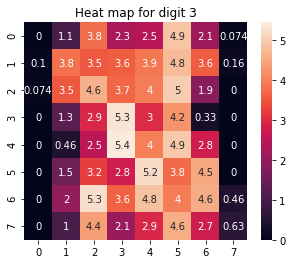

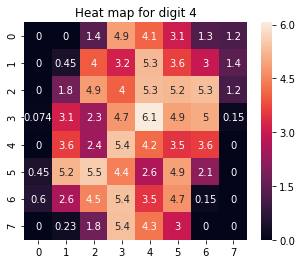

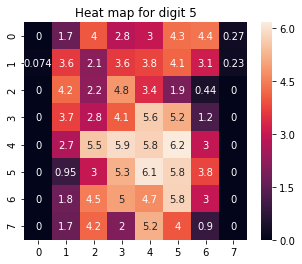

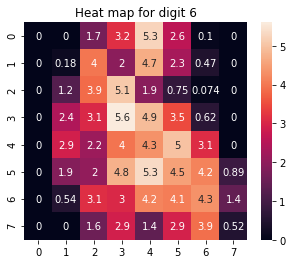

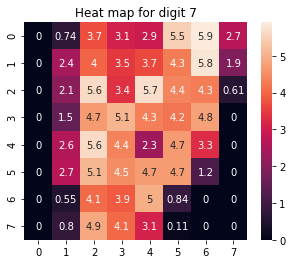

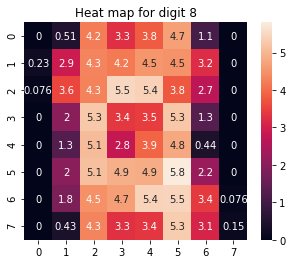

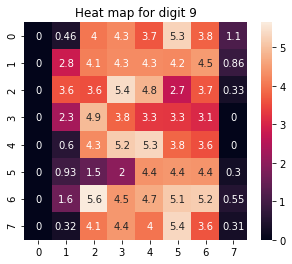

In [85]:
a = dig.groupby(digits.target)
for i in range(0,10):
    stds_bonus = a.get_group(i)
    stds_bonus = stds_bonus.std().values.reshape(8,8)
    plt.figure(figsize=(5, 4))
    sns.heatmap(stds_bonus, annot=True)
    plt.title('Heat map for digit {}'.format(i))
    plt.show()

Heatmaps of the first 9 digits in the dataset:


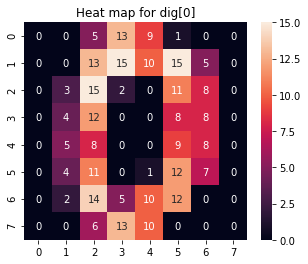

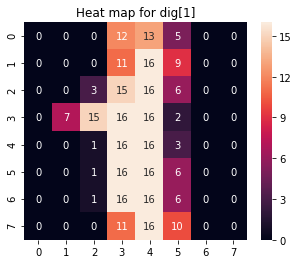

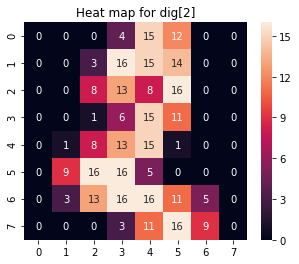

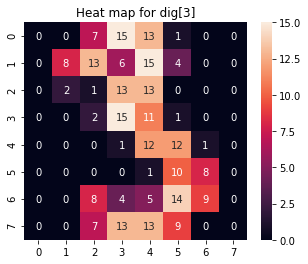

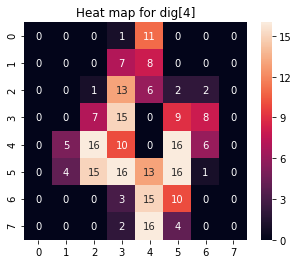

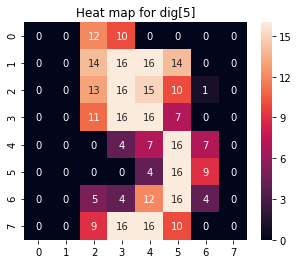

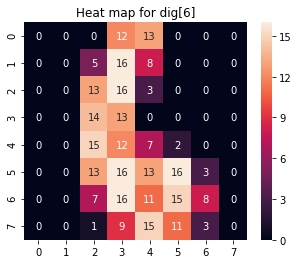

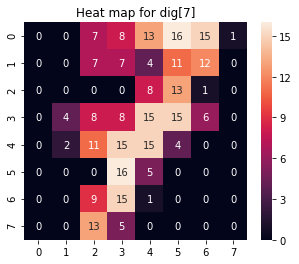

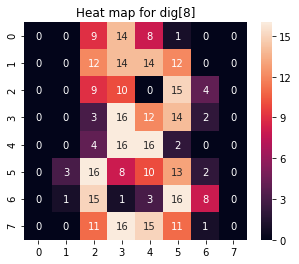

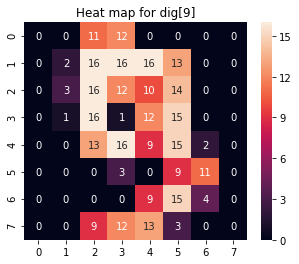

In [86]:
# 4
print('Heatmaps of the first 9 digits in the dataset:')
for i in range(0,10):
    b = dig.loc[i].values.reshape(8,8)
    plt.figure(figsize=(5, 4))
    sns.heatmap(b, annot=True)
    plt.title('Heat map for dig[{}]'.format(i))
    plt.show()

*Your answer goes here*

Not all dimensions are going to be equally helpful for modelling since outer columns (0 and 7) are almost always equal to 0 and will not be useful in distinguishing the digits. This is expected since none of the digits have shape that involve those outer colums.

### ========== Question 2.2 --- [10 marks] ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

>= 95% of variance for 29 components


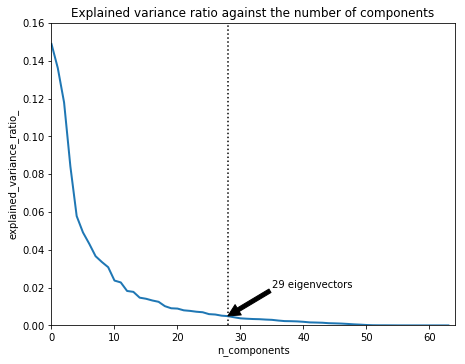

In [87]:
# Your code goes here
pca = PCA(n_components=digits.data.shape[1])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

pca.fit(X_digits)

variance_sum = 0
point = 0
for i in range(0,len(pca.explained_variance_ratio_)):
    variance_sum = variance_sum + pca.explained_variance_ratio_[i]
    if variance_sum >= 0.95:
        point = i
        print('>= 95% of variance for {} components'.format(i+1))
        break

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
ax = plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.vlines(point, 0, 0.16, linestyles=':')
plt.annotate('29 eigenvectors', xy=[28,0.005], xytext=[35,0.02],
             arrowprops=dict(facecolor='black'))
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.title('Explained variance ratio against the number of components')
plt.ylim(0,0.16)
plt.xlim(0,64)
plt.show()

*Your answer goes here*

We can see that the explained variance ratio varies significantly for different components. Only 29 eigenvectors (PCA components) are necessary to capture 95% of the variance. This means that we could consider only those components and and achieve similar results as if we considered all 64 of them. This was expected since some parts of the images were never black (those are not helpful for classification as explained in the previous question).

### ========== Question 2.3 --- [8 marks] ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

Heatmaps of the first 9 digits in the dataset:


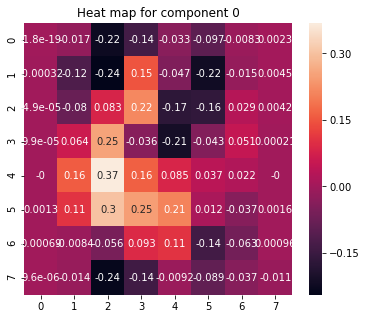

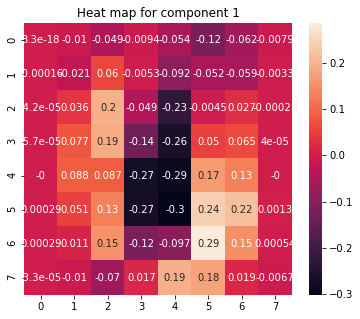

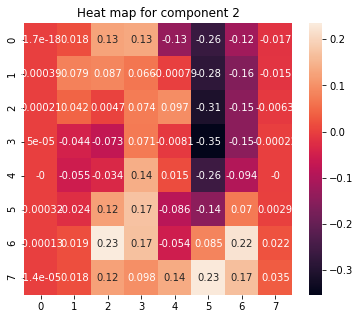

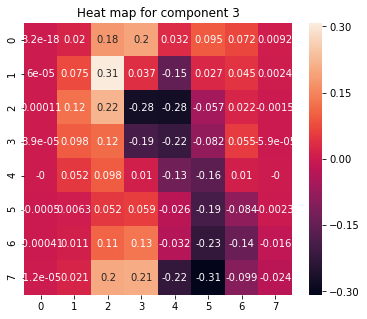

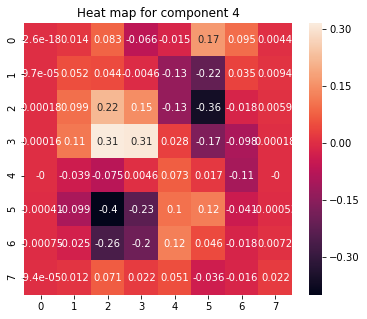

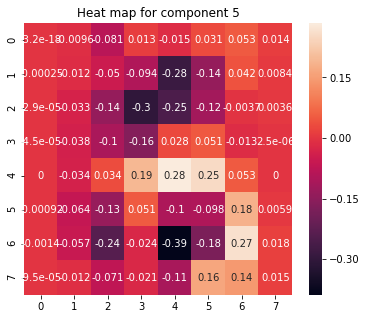

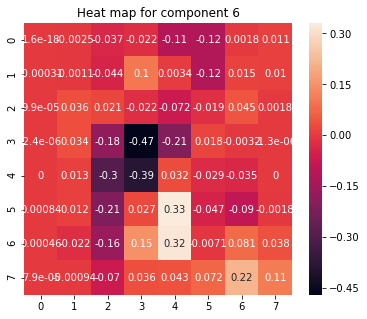

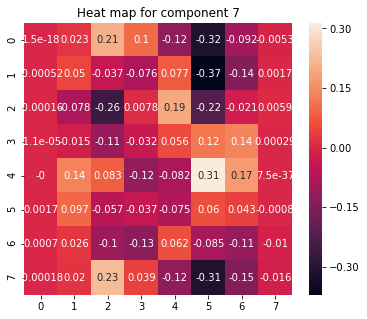

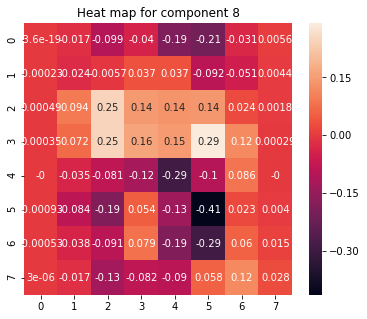

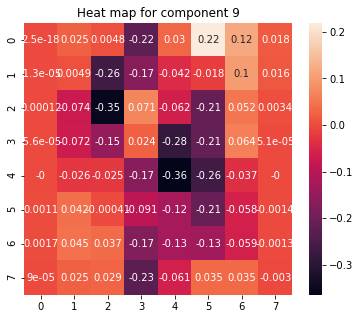

In [88]:
# Your code goes here
print('Heatmaps of the first 9 digits in the dataset:')
for i in range(0,10):
    b = pca.components_[i].reshape(8,8)
    plt.figure(figsize=(6, 5))
    sns.heatmap(b, annot=True)
    plt.title('Heat map for component {}'.format(i))
    plt.show()

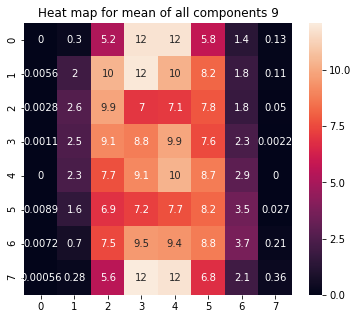

In [89]:
c = pca.mean_.reshape(8,8)
plt.figure(figsize=(6, 5))
sns.heatmap(c, annot=True)
plt.title('Heat map for mean of all components {}'.format(i))
plt.show()

### ========== Question 2.4 --- [10 marks] ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

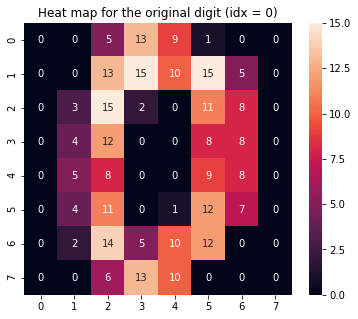

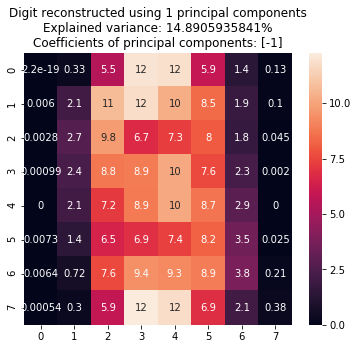

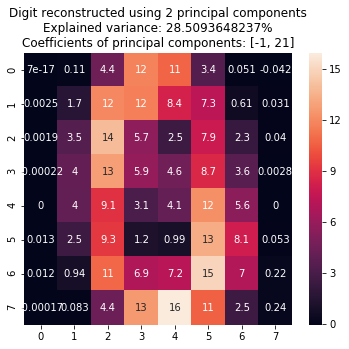

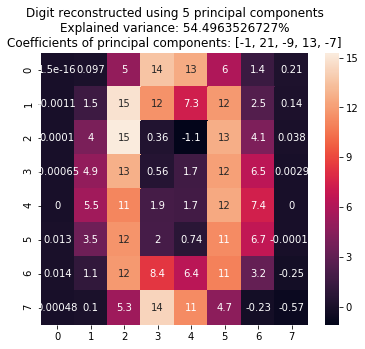

In [90]:
# Your code goes here
coef = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()
comp = [1,2,5]

plt.figure(figsize=(6, 5))
sns.heatmap(digits.images[0], annot=True)
plt.title('Heat map for the original digit (idx = 0)')
plt.show()

for i in comp:
    plt.figure(figsize=(6, 5))
    im = pca.mean_
    components_used = []
    variance_covered = 0
    for j in range(0,i):
        im = im + coef[j] * pca.components_[j]
        components_used.append(int(coef[j]))
        variance_covered = variance_covered + pca.explained_variance_ratio_[j]
    sns.heatmap(im.reshape(8,8), annot=True)
    plt.title('Digit reconstructed using {} principal components\nExplained variance: {}%\nCoefficients of principal components: {}'
              .format(i,variance_covered*100,components_used))
    plt.show()

*Your answer goes here*

Eigenvectors seem to produce realistic data. As the number of the components increases, percentage of explained variance increases and the heatmap resembles the shape of the digit more clearly. However, some of the values are negative which seems unrealistic since (according to the original image) the data only consists positive values.

### ========== Question 2.5 --- [14 marks] ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved when we used PCA, but the other did not!

In [91]:
# Your code goes here
kf = KFold(digits.data.shape[0] , n_folds=5, shuffle=True, random_state=0)
dig_normal = digits.data
dig_trans = pca.fit_transform(digits.data)

In [92]:
#1:
svc_kf = SVC(kernel='linear', shrinking=False, random_state=0)

score = 0
for train_index, test_index in kf:
    X_train_kf = dig_normal[train_index]
    y_train_kf = digits.target[train_index]
    X_test_kf = dig_normal[test_index]
    y_test_kf = digits.target[test_index]
    
    svc_kf.fit(X_train_kf, y_train_kf)
    score = score + svc_kf.score(X_test_kf, y_test_kf)
print('Score for SVC with linear kernel (NOT transformed data): {}'.format(score/5))

Score for SVC with linear kernel (NOT transformed data): 0.984422779325


In [93]:
#2:
svc_kf = SVC(kernel='linear', shrinking=False, random_state=0)

score = 0
for train_index, test_index in kf:
    X_train_kf = dig_trans[train_index]
    y_train_kf = digits.target[train_index]
    X_test_kf = dig_trans[test_index]
    y_test_kf = digits.target[test_index]
    
    svc_kf.fit(X_train_kf, y_train_kf)
    score = score + svc_kf.score(X_test_kf, y_test_kf)
print('Score for SVC with linear kernel (transformed data): {}'.format(score/5))

Score for SVC with linear kernel (transformed data): 0.984422779325


In [94]:
#3:
gaussian_kf = GaussianNB()

score = 0
for train_index, test_index in kf:
    X_train_kf = dig_normal[train_index]
    y_train_kf = digits.target[train_index]
    X_test_kf = dig_normal[test_index]
    y_test_kf = digits.target[test_index]
    
    gaussian_kf.fit(X_train_kf, y_train_kf)
    score = score + gaussian_kf.score(X_test_kf, y_test_kf)
print('Score for Gaussian Naive Bayes Classifier (NOT transformed data): {}'.format(score/5))

Score for Gaussian Naive Bayes Classifier (NOT transformed data): 0.833611884865


In [95]:
#4:
gaussian_kf = GaussianNB()

score = 0
for train_index, test_index in kf:
    X_train_kf = dig_trans[train_index]
    y_train_kf = digits.target[train_index]
    X_test_kf = dig_trans[test_index]
    y_test_kf = digits.target[test_index]
    
    gaussian_kf.fit(X_train_kf, y_train_kf)
    score = score + gaussian_kf.score(X_test_kf, y_test_kf)
print('Score for Gaussian Naive Bayes Classifier (transformed data): {}'.format(score/5))

Score for Gaussian Naive Bayes Classifier (transformed data): 0.88872175797


*Your answer goes here*

As we can see from above scores, PCA improved Gaussian Naive Bayes Classifier's performance significantly while did not affect the performance of SVC with linear kernel. 

The improvement in Gaussian Naive Bayes Classifier's performance might be due to the Naive Bayes assumption. NB classifier assumes that pixels (dimensions) are independent from each other (not true in real life since each digit occupies more than 1 pixel so we need to feel few subsequent pixels to draw a digit). Since PCA makes the dimensions more independent (less correlated), it is not surprising that the performance of NB classifier has improved.

No improvement in the performance of SVC with linear kernel was caused by the fact that PCA does not affect the margin that the SVC is trying to maximise. PCA transforms the dimensions (new dimensions may be rotated etc.) but this does not affect orientation of the data.